<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

## IBM Capstone Project

# The Battle of the Neighborhoods - Week 1, Part 1

## Opening a new Chinese Restaurant in Bucharest, Romania

*Alhassan Abdul-Mumin*

#                                                    August 2021


<h1>TABLE OF CONTENTS </h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#about_dataset">Introduction</a></li>
        <li><a href="#downloading_data">Business Problem</a></li>
        <li><a href="#pre-processing">Data Collection, Description and Analysis</a></li>
        <li><a href="#setting_up_tree">Methodology</a></li>
        <li><a href="#modeling">Results Section</a></li>
        <li><a href="#prediction">Prediction</a></li>
        <li><a href="#evaluation">Discussion</a></li>
        <li><a>Conclusion</a></li>
    </ol>
</div>
<br>
<hr>

### INTRODUCTION

Chinese cuisine takes centre stage across the world.
For centuries, the influence of China has been felt across the globe. But the Asian superpower’s growing authority doesn’t only affect the economy: China’s impressive presence is also having an impact on culinary habits. China’s emergence as a global economic powerhouse has led to it having financial interests across the face of the world. Investments range from African natural resources. This has led to the emergence of many Chinese restaurants in Europe and in Romania. As a result, one has to take pragmatic steps in opening a new Chinese restaurant in Romania in order to succeed and outlive competition. We try to group the neighborhoods of Bucharest, Romania and draw insights to where best to open a Chinese restaurant.


### BUSINESS PROBLEM

The aim is to help investors choose the best neighborhood to establish a Chinese restaurant to generate optimum profit. This also helps investors and similar organizations make decisions if they are thinking about opening other restaurants in other location in the country or even if they want to relocate neighbourhoods within the city. Our findings will help stakeholders make informed decisions and address any concerns they have including the different kinds of cuisines, provision stores and what the city has to offer. 

## The Battle of the Neighborhoods - Week 1, Part 2

### DATA COLLECTION, DESCRIPTION AND ANALYSIS

First of all we will try to convert address data into their equivalent latitude and longitude values. For Bucharest neighborhood data, I will use Wikipedia, https://en.wikipedia.org/wiki/Category:Districts of Bucharest. We will go use the Foursquare API to explore Bucharest neighborhoods and to get venues in neighborhoods. We will use the Foursquare API to get venue ratings and likes in neighborhoods, use the k-means clustering and Agglomerative algorithms to complete clustering task, and use the Folium library to visualize the neighborhoods, venues, clusters in Bucharest

### METHODOLOGY 

We will be creating our model with the help of Python so we start off by importing all the required packages.

In [4]:
import pandas as pd
import requests
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import folium
from sklearn.cluster import KMeans

Package breakdown:

* Pandas : To collect and manipulate data in JSON and HTMl and then data analysis
* requests : Handle http requests
* matplotlib : Detailing the generated maps
* folium : Generating maps of London and Paris
* sklearn : To import K means which is the machine learning model that we are using.

The approach taken here is to explore each of the sectors of the city individually, plot the map to show the neighbourhoods being considered and then build our model by clustering all of the similar neighbourhoods together and finally plot the new map with the clustered neighbourhoods. We draw insights and then compare and discuss our findings.


## The Battle of the Neighborhoods - Week 2

<a id='item1'></a>
### Download and Explore Neigborhood Dataset

#### Import Libraries

In [20]:
#install libraries 
!pip install geopy    
!pip install folium   
!pip install geocoder
!pip install beautifulsoup4

In [21]:
#import libraries 
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt # for graphical usage 

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import geocoder # to get coordinates

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
from folium import plugins
from folium.plugins import HeatMap

# main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/
# how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k video
from bs4 import BeautifulSoup 
import pandas as pd
import requests

print('Libraries imported.')

Libraries imported.


#### Get geocoordinates of Bucharest, Romania

In [22]:
# get coordinates of Bucharest
bucharest_address = 'Bucharest, Romania'

geolocator = Nominatim(user_agent="bucharest_explorer")
location = geolocator.geocode(bucharest_address)
latitude = location.latitude
longitude = location.longitude
bucharest_center = [latitude, longitude ]
print('The geograpical coordinate of {} are {}, {}.'.format(bucharest_address, latitude, longitude))

The geograpical coordinate of Bucharest, Romania are 44.4361414, 26.1027202.


#### Get neighborhood data of Bucharest

I used wikiPedia, "Category:Districts of Bucharest" for getting neighborhoods of Bucharest . 

In [23]:
# Read Bucharest neighborhood data 
url = "https://en.wikipedia.org/wiki/Category:Districts of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

neighborhoodList = []

# append the data into the list
for row in soup.find_all("div", class_="mw-category")[0].findAll("li"):
    neighborhoodList.append(row.text.replace(', Bucharest',''))
    
df_neighborhood = pd.DataFrame({"Neighborhood": neighborhoodList})
print("There are {} neighborhoods in {}".format(df_neighborhood.shape[0], bucharest_address))


There are 40 neighborhoods in Bucharest, Romania


#### Get sector of neighborhood and population of sector

In [24]:
# Read Bucharest sector data from wikipedia
url = "https://en.wikipedia.org/wiki/Sectors of Bucharest"
source = requests.get(url).text
soup = BeautifulSoup(source,'lxml')

sectorPopList = []
sectorPopulationList = []

for row in soup.find_all("tbody"):
    header = str(row.findAll("th"))
    if "Population (October 2011)" in header:
        i = 0
        for td in row.find_all("td"):
            i+=1
            if i==2: 
                sectorPopList.append(td.text.replace("\n",""))
            if i==3: 
                sectorPopulationList.append(td.text.replace("\n",""))    
                i=0

df_sectorPop = pd.DataFrame({"Sector": sectorPopList, "Population": sectorPopulationList})

sectorNeigList =[]
sectorNeigborList =[]

for row in soup.find_all("ul"):
    if sectorPopList[0] in  row.text:
        for s in row.text.split("\n"):
            sectorNeigList.append(s.split(":")[0])
            sectorNeigborList.append(s.split(":")[1])
    
df_sector= pd.DataFrame({"Sector": sectorNeigList, "Neigborhoods": sectorNeigborList}).merge(df_sectorPop,on='Sector' )

print("There are {} Sector in {}".format(df_sector.shape[0], bucharest_address))
df_sector


There are 6 Sector in Bucharest, Romania


,Sector,Neigborhoods,Population
0,Sector 1,"Dorobanți, Băneasa, Aviației, Pipera, Aviator...","225,454"
1,Sector 2,"Pantelimon, Colentina, Iancului, Tei, Floreas...","345,370"
2,Sector 3,"Vitan, Dudești, Titan, Centrul Civic, Balta A...","385,439"
3,Sector 4,"Berceni, Olteniței, Văcărești, Timpuri Noi, T...","287,828"
4,Sector 5,"Rahova, Ferentari, Giurgiului, Cotroceni, 13 ...","271,575"
5,Sector 6,"Giulești, Crângași, Drumul Taberei, Militari,...","367,760"


#### Set sector of neighborhoods 

In [25]:
def getSector(row):
    for i in range(df_sector.shape[0]):
        if row["Neighborhood"] in  df_sector.iloc[i].Neigborhoods:
            return pd.Series([df_sector.iloc[i].Sector, df_sector.iloc[i].Population], index = ['Sector','SectorPopulation'])

df_neighborhood[["Sector","SectorPopulation"]] =df_neighborhood.apply(getSector, axis=1)
df_neighborhood.head(5)

,Neighborhood,Sector,SectorPopulation
0,Aviației,Sector 1,"225,454"
1,Băneasa,Sector 1,"225,454"
2,Berceni,Sector 4,"287,828"
3,Bucureștii Noi,Sector 1,"225,454"
4,Centrul Civic,Sector 3,"385,439"


#### Get geographical coordinates of neighborhoods
I use python geocoder library to get geograpical coordinates of neighborhoods

In [26]:
# define a function to get coordinates
def get_latlng(neighborhood):
    # initialize your variable to None
    lat_lng_coords = None
    # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, {}'.format(neighborhood,bucharest_address))
        lat_lng_coords = g.latlng
    return lat_lng_coords

coords = [ get_latlng(neighborhood) for neighborhood in df_neighborhood["Neighborhood"].tolist() ]

df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_neighborhood['Latitude'] = df_coords['Latitude']
df_neighborhood['Longitude'] = df_coords['Longitude']
print("Geographical coordinates of five neighborhoods are as below")
df_neighborhood.head()

Geographical coordinates of five neighborhoods are as below


,Neighborhood,Sector,SectorPopulation,Latitude,Longitude
0,Aviației,Sector 1,"225,454",44.48579,26.101220
1,Băneasa,Sector 1,"225,454",44.49401,26.080372
2,Berceni,Sector 4,"287,828",44.38620,26.128960
3,Bucureștii Noi,Sector 1,"225,454",44.48842,26.036494
4,Centrul Civic,Sector 3,"385,439",44.43430,26.094660


#### Create Bucharest map with neighborhoods superimposed
Let's see locations of neighborhoods on map. In here, I use folium library to draw map

In [27]:
#create map of Bucharest neighborhoods using latitude and longitude values
map_bucharest= folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng,  neighborhood in zip(df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bucharest)  
    
map_bucharest

<a id='item2'></a>
# 2. Load Venues and Analyze Neighborhoods in Bucharest

We will use Foursquare API for getting venues of neighborhoods

#### Explore Venues of Bucharest neighborhoods
I get venue list with 1 km distance to neighborhood's center

In [30]:
CLIENT_ID = 'V0DGIPOL3TARSV1GJA3IFZZMB4XK4BLS1WLMHEKVY0ZXOG5L' # your Foursquare ID
CLIENT_SECRET = 'OPHJQIJSA33Y3HU1TIM4LNMT5HJOAXAO2AU2VIITTPQGFU3S' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V0DGIPOL3TARSV1GJA3IFZZMB4XK4BLS1WLMHEKVY0ZXOG5L
CLIENT_SECRET:OPHJQIJSA33Y3HU1TIM4LNMT5HJOAXAO2AU2VIITTPQGFU3S


In [31]:
LIMIT = 100

def getNeighborhoodVenues( latitude, longitude,neighborhood, radius=1000 ):
    venues = []
    for lat, long, neighborhood in zip(latitude, longitude ,neighborhood):

        # create the API request URL
        url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
            CLIENT_ID,
            CLIENT_SECRET,
            VERSION,
            lat,
            long,
            radius, 
            LIMIT)

        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']

        # return only relevant information for each nearby venue
        for venue in results:
            venues.append((
                neighborhood,
                lat, 
                long, 
                venue['venue']['name'], 
                venue['venue']['id'], 
                venue['venue']['location']['lat'], 
                venue['venue']['location']['lng'],  
                venue['venue']['location']['distance'],  
                venue['venue']['categories'][0]['name']))
    
    # convert the venues list into a DataFrame
    venues = pd.DataFrame(venues)
    # define the column names
    venues.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueName', 'VenueId', 'VenueLatitude', 'VenueLongitude','VenueDistance','VenueCategory']
            
    return venues 

neighborhood_venues = getNeighborhoodVenues (df_neighborhood['Latitude'], df_neighborhood['Longitude'], df_neighborhood['Neighborhood'] )

print('There are {} unique venue categories. Some of them are as below:'.format(len(neighborhood_venues['VenueCategory'].unique())))
neighborhood_venues.head()

There are 214 unique venue categories. Some of them are as below:


,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory
0,Aviației,44.48579,26.10122,ibis Styles Bucharest Erbas,5bbb782175dcb7002cc15ee7,44.483963,26.097134,382,Hotel
1,Aviației,44.48579,26.10122,LIDL,583956246d349d0574eb02ac,44.488396,26.094375,616,Supermarket
2,Aviației,44.48579,26.10122,Mega Image Concept Store,56348b62498e53f51a0a4e0e,44.479783,26.102568,677,Supermarket
3,Aviației,44.48579,26.10122,Starbucks,525fd077498eed1c5a52c1d6,44.478522,26.102503,815,Coffee Shop
4,Aviației,44.48579,26.10122,Flying Pig,58a2fc95d0bb3e516a2363b7,44.479454,26.102837,716,Burger Joint


In [32]:
print('Top 10 distinct venue counts are as below')
neighborhood_venues[['VenueId','VenueCategory']].drop_duplicates().groupby('VenueCategory').count()[['VenueId']].rename(columns={"VenueId": "Count"}).sort_values(by=['Count'], ascending=False)[:10]

Top 10 distinct venue counts are as below


,Count
VenueCategory,
Coffee Shop,66
Café,66
Restaurant,62
Supermarket,48
Pizza Place,45
Italian Restaurant,45
Romanian Restaurant,38
Gym,37
Park,35


#### Filter restaurants out of all venues
Let's filter venues and get only restaurants 

In [38]:
restaurant_list =['Restaurant', 'Burger Joint','Café','Fried Chicken Joint','Pizza Place']
chinese_restaurant_list = ['Chinese Restaurant', 'Italian Restaurant']

# Filter restaurants 
    
neighborhood_venues['RestFlag']=False
for restCat in restaurant_list:
    neighborhood_venues['RestFlag'] = neighborhood_venues['RestFlag'] | neighborhood_venues['VenueCategory'].str.contains(restCat)
    
neighborhood_restaurants = neighborhood_venues[neighborhood_venues['RestFlag'] == True].iloc[:,:-1]
chinese_restaurants = neighborhood_restaurants[ neighborhood_restaurants['VenueCategory'].isin(chinese_restaurant_list) ]
other_restaurants = neighborhood_restaurants[ ~neighborhood_restaurants['VenueCategory'].isin(chinese_restaurant_list) ]

print('Total number of restaurants:', len(neighborhood_restaurants['VenueId'].unique()))
print('Total number of Chinese restaurants:', len(chinese_restaurants['VenueId'].unique()))
print('Percentage of Chinese restaurants: {:.2f}%'.format(len(chinese_restaurants['VenueId'].unique()) / len(neighborhood_restaurants['VenueId'].unique()) * 100))


Total number of restaurants: 469
Total number of Chinese restaurants: 58
Percentage of Chinese restaurants: 12.37%


In [39]:
# get counts of restaurants in each Neighborhood
df_rest_counts =  neighborhood_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "RestaurantCount"})[['RestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(neighborhood_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_rest_counts = df_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'RestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_rest_counts.reset_index(inplace=True)

#####
# get counts of Turkish restaurants in each Neighborhood
df_chinese_rest_counts =  chinese_restaurants.groupby(['Neighborhood']).count().rename(columns={"VenueCategory": "ChineseRestaurantCount"})[['ChinesekRestaurantCount']]

#find neighborhoods that does not have any restaurant 
noRestList = list(set(neighborhood_venues['Neighborhood']) - set(chinese_restaurants['Neighborhood']))

#if exists , append neighborhoods without any restaurant to df_rest_counts
if noRestList != []:
    df_chinese_rest_counts = df_chinese_rest_counts.append (pd.DataFrame( {'Neighborhood' : noRestList  , 'ChineseRestaurantCount': [0] * len(noRestList) } ).set_index('Neighborhood'))

df_chinese_rest_counts.reset_index(inplace=True)
df_rest_counts= df_rest_counts.merge(df_chinese_rest_counts).set_index('Neighborhood')
df_rest_counts= df_rest_counts.sort_values(by=['RestaurantCount'],ascending =False)

print('{} neighborhoods do not have any Chinese restaurant'.format(len(noRestList)))
######
#Draw graph
df_rest_counts[['RestaurantCount','ChinseRestaurantCount']].plot(kind='bar',figsize=(15,5))
plt.title('Restaurant Counts of Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Restaurant Counts')
plt.show()



KeyError: "None of [Index(['ChinesekRestaurantCount'], dtype='object')] are in the [columns]"

We can see from the Graph :
* Vitan is the neihgborhood having most restaurants
* Dorobanti is has lots of restaurants , but no Tukish restaurant
* Odai and Gluesti are neihgborhoods having least number of restaurants
* 19 neihgborhoods do not have any Turkish restaurant. we can choose one of these to open resaturant. To filter more let's continue

#### Get the restaurant's overall rating

I used Foursquare API for getting likes and rates of restaurants 

In [40]:
def getVenueRaitings(venues):
    
    raitings = []
    likes =[]
    for venueId in venues:

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venueId, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()
        try:
            rating = result['response']['venue']['rating']
            likes = result['response']['venue']['likes']['count']
        except:
            rating = None
            likes = None
        
        raitings.append((venueId, rating,likes))
 
    # convert the venues list into a DataFrame
    rating = pd.DataFrame(raitings)
    # define the column names
    rating.columns = ['VenueId', 'VenueRating','VenueLikes']

    return rating    

restaurants_raitings = getVenueRaitings(neighborhood_restaurants['VenueId'].drop_duplicates())
restaurants_raitings.head()

,VenueId,VenueRating,VenueLikes
0,58a2fc95d0bb3e516a2363b7,8.2,22.0
1,55b8a459498efbbb6ca3526d,8.2,9.0
2,53623e44498ed583ede334f5,8.1,132.0
3,59ee47be0d8a0f244d41fca7,7.6,9.0
4,59162d2d2be42556981e1e4a,7.5,71.0


In [41]:
#merge raitings to restaurants 
neighborhood_restaurants = neighborhood_restaurants.merge(restaurants_raitings)
neighborhood_restaurants.head()

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Aviației,44.48579,26.101220,Flying Pig,58a2fc95d0bb3e516a2363b7,44.479454,26.102837,716,Burger Joint,8.2,22.0
1,Floreasca,44.47633,26.103279,Flying Pig,58a2fc95d0bb3e516a2363b7,44.479454,26.102837,349,Burger Joint,8.2,22.0
2,Aviației,44.48579,26.101220,Toàn's,55b8a459498efbbb6ca3526d,44.478370,26.103411,844,Vietnamese Restaurant,8.2,9.0
3,Floreasca,44.47633,26.103279,Toàn's,55b8a459498efbbb6ca3526d,44.478370,26.103411,227,Vietnamese Restaurant,8.2,9.0
4,Aviației,44.48579,26.101220,trickSHOT,53623e44498ed583ede334f5,44.478378,26.103135,838,Restaurant,8.1,132.0


In [42]:
#merge raitings to turkish restaurants 
chinese_restaurants = chinese_restaurants.merge(restaurants_raitings)
chinese_restaurants.head(5)

,Neighborhood,Latitude,Longitude,VenueName,VenueId,VenueLatitude,VenueLongitude,VenueDistance,VenueCategory,VenueRating,VenueLikes
0,Aviației,44.485790,26.101220,Il Capo,55859bef498eca16beae6deb,44.484500,26.090150,890,Italian Restaurant,7.3,11.0
1,Băneasa,44.494010,26.080372,Premiata,589cbcc1f595726efd494e51,44.493836,26.085516,408,Italian Restaurant,7.8,16.0
2,Băneasa,44.494010,26.080372,DowClass,4d6940932acd6ea845ae37c0,44.491571,26.083154,350,Italian Restaurant,6.0,4.0
3,Centrul Civic,44.434300,26.094660,Stadio,4db2d15d6a23c31a02f32f6b,44.437198,26.099244,486,Italian Restaurant,NaN,NaN
4,Lipscani,44.431885,26.100915,Stadio,4db2d15d6a23c31a02f32f6b,44.437198,26.099244,606,Italian Restaurant,NaN,NaN


#### Show restaurants on head map 

Let's crete a map showing heatmap / density of restaurants and try to extract some meaningfull info from that. Also, let's show borders of Bucharest on our map and a few circles indicating distance of 2km, 4km, 6km and 10km from Bucharest center

Red markers are Turkish restaurants

Blue markers are Turkish restaurants with rating less than 7 restaurants


In [45]:
bucharest_center = [latitude, longitude]
map_restaurant= folium.Map(location=bucharest_center, zoom_start=12)
df_neighborhood_noturkrest = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_bucharest) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(bucharest_center).add_to(map_bucharest)
folium.Circle(bucharest_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig, name in zip(chinese_restaurants['VenueLatitude'], chinese_restaurants['VenueLongitude'], chinese_restaurants['Neighborhood'], chinese_restaurants['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)
       
raiting_lt_7 = chinese_restaurants[chinese_restaurants['VenueRating'] <7]
for lat, lon, neig, name in zip(raiting_lt_7['VenueLatitude'], raiting_lt_7['VenueLongitude'], raiting_lt_7['Neighborhood'], raiting_lt_7['VenueName']):
    label = folium.Popup(str(name) + ' - ' + str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_restaurant)        
map_restaurant

NameError: name 'VenueLatitude' is not defined

From heat map , we can see that there are 
* Too many restaurants in 4 km to the center 
* Enough restaurants between 4-6 km to the center 
* There are <b> not many </b> restaurants after <b> 6 km to center </b> 
* Turkish restaurants are superimposed with red and blue dots. Blue dots are Turkish restaurant with raiting <7 
* <b> Turkish restaurants are located in South, North , East, between 2-4 Km distance around center </b>
* There are <b> not Turkish Restaurants in West Part.</b>
* 3 Turkish restaurants gets bad points. That means people does not prefer these restaurant too much and any turkish restaurant may be opened around

#### Show neighborhoods which has no Turkish restaurant on head map 

Cyan markers are Neigborhoods without any turkish restaurants

In [44]:
bucharest_center = [latitude, longitude]
map_restaurant= folium.Map(location=bucharest_center, zoom_start=12)

df_neighborhood_nochinrest = df_neighborhood[df_neighborhood['Neighborhood'].isin(noRestList)]

folium.TileLayer('cartodbpositron').add_to(map_bucharest) 
HeatMap(neighborhood_restaurants[['VenueLatitude','VenueLongitude']]).add_to(map_restaurant)
folium.Marker(bucharest_center).add_to(map_bucharest)
folium.Circle(bucharest_center, radius=2000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=4000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=6000, fill=False, color='white').add_to(map_restaurant)
folium.Circle(bucharest_center, radius=10000, fill=False, color='black').add_to(map_restaurant)
for lat, lon, neig in zip(df_neighborhood_nochinrest['Latitude'], df_neighborhood_noturkrest['Longitude'], df_neighborhood_nochinrest['Neighborhood']):
    label = folium.Popup(str(neig), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='cyan',
        fill=True,
        fill_color='cyan',
        fill_opacity=0.7).add_to(map_restaurant)
map_restaurant

TypeError: must be real number, not str

<a id='item3'></a>
# 3. Cluster Neigborhoods using Agglomerative Clustering

In [46]:
# one hot encoding
onehot = pd.get_dummies(neighborhood_venues[['VenueCategory']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
onehot['Neighborhood'] = neighborhood_venues['Neighborhood']

venues_grouped = onehot.groupby(["Neighborhood"]).sum().reset_index()

# move neighborhood column to the first column and filter only restaurant columns 
fixed_columns =['Neighborhood'] + list(neighborhood_venues['VenueCategory'].unique())
venues_grouped = venues_grouped[fixed_columns]

print("{}  neighborhoods' venue category are shown in {} columns as below".format(venues_grouped.shape[0],venues_grouped.shape[1]-1))
venues_grouped.head()

40  neighborhoods' venue category are shown in 214 columns as below


,Neighborhood,Hotel,Supermarket,Coffee Shop,Burger Joint,Beer Garden,Dessert Shop,Roof Deck,Vietnamese Restaurant,Gym / Fitness Center,Restaurant,Salad Place,Salon / Barbershop,Shopping Mall,Sushi Restaurant,Pie Shop,Bookstore,Grocery Store,Steakhouse,Café,Italian Restaurant,Clothing Store,Turkish Restaurant,Toy / Game Store,Bakery,Lebanese Restaurant,Casino,Spanish Restaurant,Pizza Place,Athletics & Sports,Fried Chicken Joint,Indoor Play Area,Event Space,Lounge,Eastern European Restaurant,Stadium,Tennis Stadium,Drugstore,German Restaurant,Playground,Cocktail Bar,Nightclub,Gym,Romanian Restaurant,Doner Restaurant,Middle Eastern Restaurant,Vegetarian / Vegan Restaurant,Lake,Park,Sandwich Place,Tunnel,Theme Restaurant,Soccer Field,Nature Preserve,Farmers Market,Fast Food Restaurant,Pharmacy,Electronics Store,Metro Station,Fountain,Gas Station,Theater,Light Rail Station,Mobile Phone Shop,Shop & Service,Korean Restaurant,Gastropub,Bistro,Indie Theater,Outdoor Sculpture,Monastery,Palace,Skating Rink,Used Bookstore,Historic Site,Chocolate Shop,Ice Cream Shop,Bar,Art Museum,Plaza,Tea Room,Beer Bar,Concert Hall,Rock Club,Wine Bar,Cosmetics Shop,Art Gallery,Pub,Boutique,French Restaurant,Mediterranean Restaurant,Church,Hostel,Greek Restaurant,History Museum,Pool,Breakfast Spot,Cupcake Shop,Hardware Store,Discount Store,Arts & Crafts Store,Herbs & Spices Store,Bus Station,Gift Shop,Tennis Court,Jazz Club,Accessories Store,Market,Opera House,Garden,Pedestrian Plaza,Hotel Bar,Indian Restaurant,Music Store,Spa,Indie Movie Theater,Australian Restaurant,Martial Arts School,Shoe Store,Furniture / Home Store,Department Store,Climbing Gym,Soccer Stadium,Miscellaneous Shop,Convenience Store,Outlet Mall,Sporting Goods Shop,Intersection,Mexican Restaurant,Flower Shop,Japanese Restaurant,Fish Market,Scandinavian Restaurant,Asian Restaurant,Juice Bar,Cheese Shop,Seafood Restaurant,Modern European Restaurant,Fruit & Vegetable Store,Creperie,Wine Shop,Molecular Gastronomy Restaurant,Hookah Bar,American Restaurant,Pet Store,Auto Workshop,Multiplex,Eye Doctor,Skate Park,Chinese Restaurant,Currency Exchange,Pastry Shop,ATM,Water Park,Brewery,Bed & Breakfast,Women's Store,Diner,Health Food Store,Auto Dealership,Platform,Food & Drink Shop,Portuguese Restaurant,Science Museum,Street Food Gathering,Lingerie Store,Rental Car Location,Bagel Shop,Museum,Health & Beauty Service,Food Truck,Buffet,Movie Theater,Kebab Restaurant,Exhibit,Snack Place,Public Art,Pool Hall,Tattoo Parlor,Gourmet Shop,Camera Store,Bridal Shop,BBQ Joint,Big Box Store,Hungarian Restaurant,Noodle House,Karaoke Bar,Beach,Auto Garage,Sports Club,Go Kart Track,Food Court,Track,Recreation Center,Gym Pool,Bike Shop,Dog Run,Basketball Court,Bowling Alley,Paper / Office Supplies Store,Sports Bar,Laundromat,Business Service,Lighting Store,Comfort Food Restaurant,Taco Place,Fish & Chips Shop,Racetrack,Tram Station,Recording Studio,Falafel Restaurant,Jewelry Store,Smoke Shop,Soup Place,Circus
0,13 Septembrie,3,0,1,0,0,1,0,0,2,5,0,0,0,0,0,0,0,1,4,1,2,0,0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,0,1,0,1,2,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,1,0,1,1,4,2,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0
1,Aviației,3,3,4,3,1,3,1,1,2,5,1,1,1,2,1,1,1,2,5,1,2,1,1,4,2,1,1,3,1,1,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Berceni,0,2,0,0,1,0,0,0,2,1,0,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,2,1,2,1,1,1,0,0,0,0,0,0,0,0,

In [47]:
# create a new dataframe with most common venue catrgories
def return_most_common_venues(row, num_top_venues):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

columns = ['Neighborhood','Total Number of Venues']
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues

for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Restaurant'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Restaurant'.format(ind+1))

# create a new dataframe
venues_most = pd.DataFrame(columns = columns)

for ind in range(venues_grouped.shape[0]):
    venues_most.loc[ind, 'Neighborhood'] = venues_grouped.iloc[ind].Neighborhood
    venues_most.loc[ind, 'Total Number of Venues'] = venues_grouped.iloc[ind,1:].sum()
    venues_most.iloc[ind, 2:] = return_most_common_venues(venues_grouped.iloc[ind, 1:], num_top_venues)

venues_most.head()

,Neighborhood,Total Number of Venues,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant,4th Most Common Restaurant,5th Most Common Restaurant,6th Most Common Restaurant,7th Most Common Restaurant,8th Most Common Restaurant,9th Most Common Restaurant,10th Most Common Restaurant
0,13 Septembrie,66,Restaurant,Plaza,Café,Hotel,Pub,Romanian Restaurant,Clothing Store,Bistro,Comfort Food Restaurant,Seafood Restaurant
1,Aviației,72,Café,Restaurant,Coffee Shop,Bakery,Dessert Shop,Pizza Place,Hotel,Burger Joint,Supermarket,Lebanese Restaurant
2,Berceni,24,Pizza Place,Grocery Store,Farmers Market,Supermarket,Pharmacy,Gym / Fitness Center,Lebanese Restaurant,Bakery,Romanian Restaurant,Park
3,Bucureștii Noi,19,Park,Shop & Service,Gym,Supermarket,Pharmacy,Gas Station,Farmers Market,Theater,Soccer Field,Grocery Store
4,Băneasa,25,Restaurant,Hotel,Romanian Restaurant,Italian Restaurant,Grocery Store,Park,Tunnel,Pizza Place,Nightclub,Doner Restaurant


#### Cluster and find similarities between neighborhoods

I will use hierarchical agglomerative clustering method to compare neighborhoods among neighborhoods

First, find the number of clusters. Let's use scipy library to create the dendrograms for our dataset

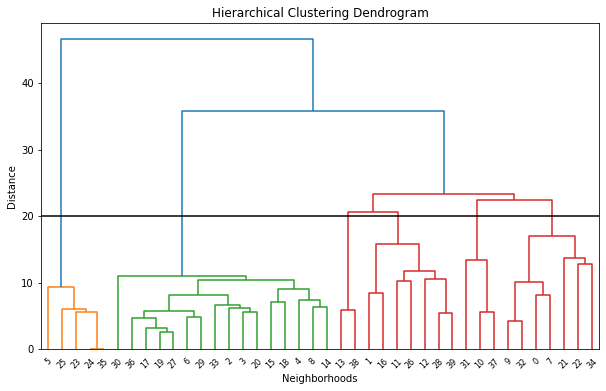

In [48]:
import scipy.cluster.hierarchy as shc

data = venues_grouped.iloc[:,3:]
plt.figure(figsize=(10, 6))   
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Neighborhoods')
plt.ylabel('Distance')
plt.axhline(y=20, c='k')
dend = shc.dendrogram(shc.linkage(data, method='ward'))

According to the above graph, I decide to separate our neighborhoods into 6 clusters (cut at distance of 20, horizontal black line). 
I will use the hierarchical agglomerative clustering of the sklearn.cluster library to cluster these neighborhoods.

In [49]:
from sklearn.cluster import AgglomerativeClustering

kclusters= 6
cluster = AgglomerativeClustering(n_clusters=kclusters, affinity='euclidean', linkage='ward')  
clusterresult = cluster.fit_predict(data)

venues_grouped['NeighborhoodCluster'] = clusterresult
venues_cluster= df_neighborhood.merge(venues_grouped[['Neighborhood','NeighborhoodCluster']])
venues_cluster =venues_cluster.merge(venues_most[['Neighborhood','1st Most Common Restaurant','2nd Most Common Restaurant','3rd Most Common Restaurant']])
venues_cluster.head()


,Neighborhood,Sector,SectorPopulation,Latitude,Longitude,NeighborhoodCluster,1st Most Common Restaurant,2nd Most Common Restaurant,3rd Most Common Restaurant
0,Aviației,Sector 1,"225,454",44.48579,26.101220,1,Café,Restaurant,Coffee Shop
1,Băneasa,Sector 1,"225,454",44.49401,26.080372,2,Restaurant,Hotel,Romanian Restaurant
2,Berceni,Sector 4,"287,828",44.38620,26.128960,2,Pizza Place,Grocery Store,Farmers Market
3,Bucureștii Noi,Sector 1,"225,454",44.48842,26.036494,2,Park,Shop & Service,Gym
4,Centrul Civic,Sector 3,"385,439",44.43430,26.094660,3,Coffee Shop,Hotel,Theater


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster, sector,SectorPopulation  in zip(venues_cluster['Latitude'], venues_cluster['Longitude'], venues_cluster['Neighborhood'], venues_cluster['NeighborhoodCluster'], venues_cluster['Sector'],venues_cluster['SectorPopulation']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster)+ ' ' + str(sector) + ' ' + str(SectorPopulation), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker(bucharest_center).add_to(map_clusters)
folium.Circle(bucharest_center, radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle(bucharest_center, radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle(bucharest_center, radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle(bucharest_center, radius=10000, fill=False, color='black').add_to(map_clusters)         
map_clusters

In [51]:
print(venues_cluster.groupby(['NeighborhoodCluster','1st Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"}))

venues_cluster.groupby(['NeighborhoodCluster','2nd Most Common Restaurant' ]).count()[['Neighborhood']].rename(columns={"Neighborhood": "Neighborhood Count"})

                                                Neighborhood Count
NeighborhoodCluster 1st Most Common Restaurant                    
0                   Coffee Shop                                  1
                    Hotel                                        1
                    Italian Restaurant                           1
                    Pub                                          1
                    Restaurant                                   3
1                   Café                                         1
                    Clothing Store                               2
                    Coffee Shop                                  1
                    Pizza Place                                  1
                    Supermarket                                  2
2                   Beach                                        1
                    Bus Station                                  2
                    Café                                      

Neighborhood Count
NeighborhoodCluster 2nd Most Common Restaurant                     
0                   Café                                          1
                    Hotel                                         1
                    Lounge                                        1
                    Plaza                                         1
                    Restaurant                                    1
                    Romanian Restaurant                           2
1                   Clothing Store                                1
                    Gym                                           1
                    Hotel                                         1
                    Italian Restaurant                            1
                    Pizza Place                                   1
                    Restaurant                                    2
2                   Burger Joint                                  2
                    Bus Station                                   2
                    Discount Store                                1
                    Eastern European Restaurant                   1
                    Grocery Store                                 1
                    Gym / Fitness Center                          1
                    Hotel                                         1
                    Pool                                          1
                    Restaurant                                    2
                    Romanian Restaurant                           1
                    Shop & Service                                1
                    Supermarket                                   2
3                   Hotel                                         4
                    Romanian Restaurant                           1
4                   Café                                          1
                    Coffee Shop                                   2
5                   Lounge                                        1
                    Supermarket                                   1

#### We can see cluster categories as below  <br>
Cluster 0 (Red)     : Italian Restaurant , Pizza, Café  <br>
Cluster 1 (Purple)  : Restaurant , Bar <br>
Cluster 2 (BLue)    : Park , Plaza, Clothing stores  <br>
Cluster 3 (Cyan)    : Coffee Shop, Hotel, Pub <br>
Cluster 4 (Green)   : Café, Suprmarket <br>
Cluster 5 (Orange)  : Café <br>

<a id='item4'></a>
## 4. Discussion 

Cluster 2 suffers from restaurant. Especially there is no Chinese restaurant in west part inluding Cluster 2 . We can think about Cluster 2 , West part

Cluster 0 especially likes Itallian tastes , may be this part will not like Turkish tastes . We can only think about 1 location may be .

Cluster 1, 2, 3 are centers full of restaurants as we saw in the heatmap also


<a id='item5'></a>
## 5. Conclusion

Possible Neighborhoods to set up a Chinese restaurant :


•	Neighborhood : Regie ,  Cluster 0, Sector 6 , Population : 367760      

    I choosed Regie , since west part of Bucharest has not Chinese restaurant and Regie is close to center . Regie is red cluster which is same with the other 2 red markers having Chinese restaurant. Red clusters populations may like Chinese food. 

•	Neighborhood : Bucureștii Noi ,  Cluster 2,  Sector 1 , Population : 225453

    I choosed Bucharest-noi , since west part of Bucharest has not Chinese restaurant and even not too much restaurant after 6 km distance to center . One restaurant will be good for this area.

•	Neighborhood : Crângași ,  Cluster 2,  Sector 6 , Population : 367760

    I choosed Crangasi , since Crangasi  and west part of Bucharest has not Chinese restaurant and from bar chart we can see that this neighborhood has not too much restaurant. Also this neighborhood is in Sector 6 and this sector has biggest population which will handle one more restaurant 

•	Neighborhood : Tineretului ,  Cluster 2,  Sector 4 , Population : 287828

    I choosed Tineretului , since Tineretului has not Chinese restaurant and from bar chart we can see that this neighborhood has not too much restaurant. 



        